In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('products_dataset.csv')

df.columns

Index(['Unnamed: 0', 'ID', 'ProdID', 'Rating', 'ReviewCount', 'Category',
       'Brand', 'Name', 'ImageURL', 'Description', 'Tags'],
      dtype='object')

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4090 non-null   int64  
 1   ID           4090 non-null   int64  
 2   ProdID       4090 non-null   int64  
 3   Rating       4090 non-null   float64
 4   ReviewCount  4090 non-null   float64
 5   Category     4081 non-null   object 
 6   Brand        3994 non-null   object 
 7   Name         4090 non-null   object 
 8   ImageURL     4090 non-null   object 
 9   Description  3174 non-null   object 
 10  Tags         4090 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 351.6+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
ID               0
ProdID           0
Rating           0
ReviewCount      0
Category         9
Brand           96
Name             0
ImageURL         0
Description    916
Tags             0
dtype: int64

In [6]:
df['Brand'].fillna('', inplace=True)
df['Description'].fillna('',inplace=True)
df['Category'].fillna('',inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)

df.drop_duplicates(inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_1268\1780747630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand'].fillna('', inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_1268\1780747630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

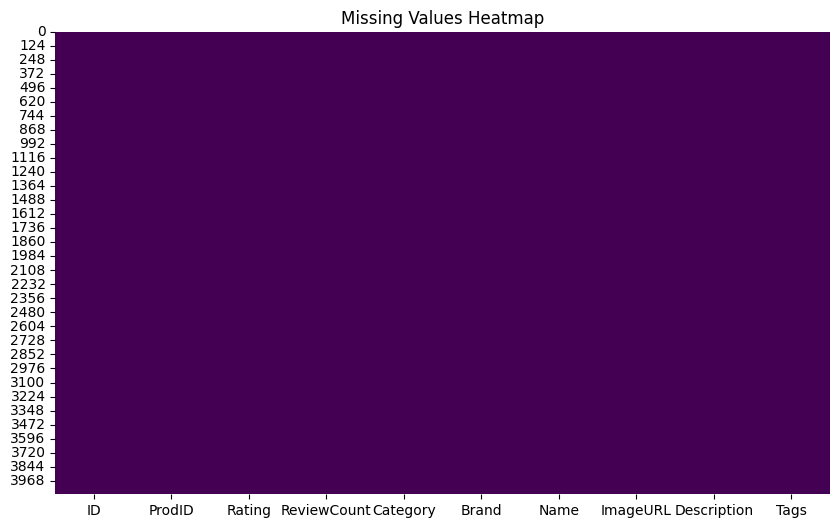

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

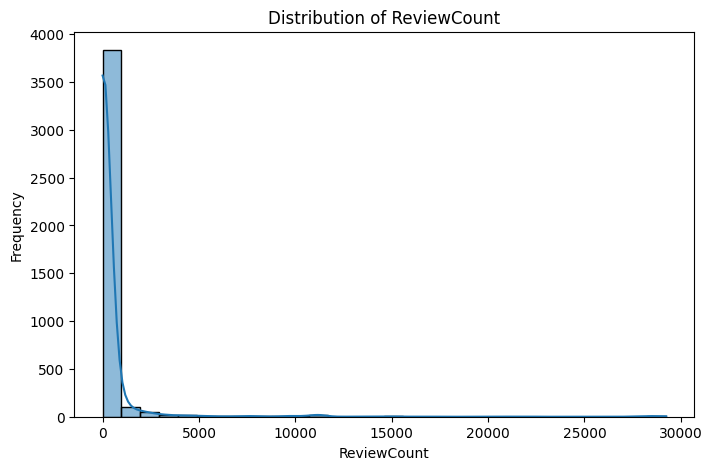

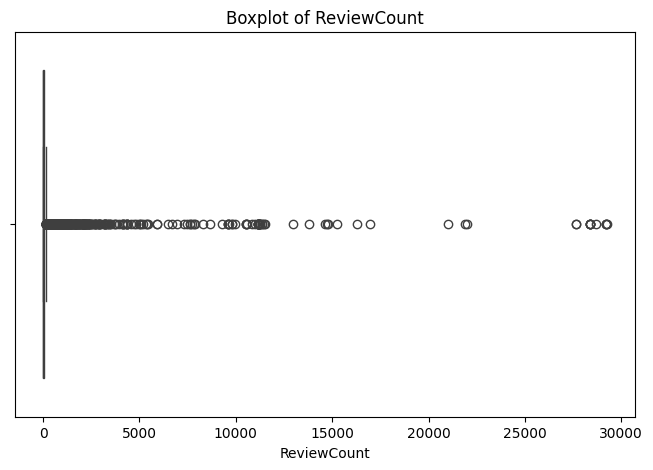

In [9]:



plt.figure(figsize=(8, 5))
sns.histplot(df['ReviewCount'], bins=30, kde=True)
plt.title(f'Distribution of ReviewCount')
plt.xlabel('ReviewCount')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x=df['ReviewCount'])
plt.title(f'Boxplot of ReviewCount')
plt.show()

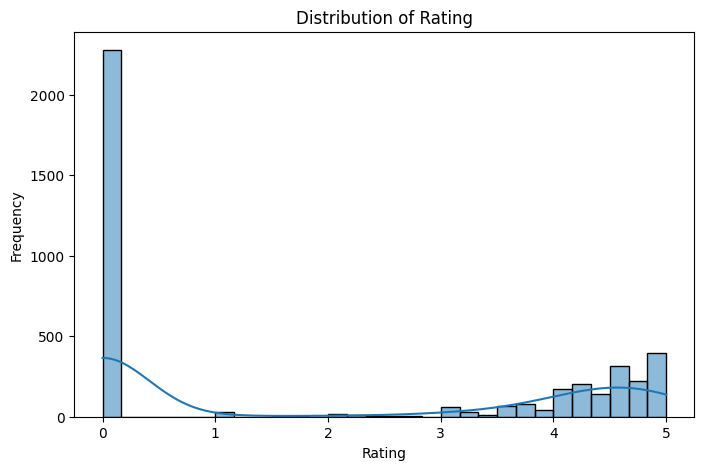

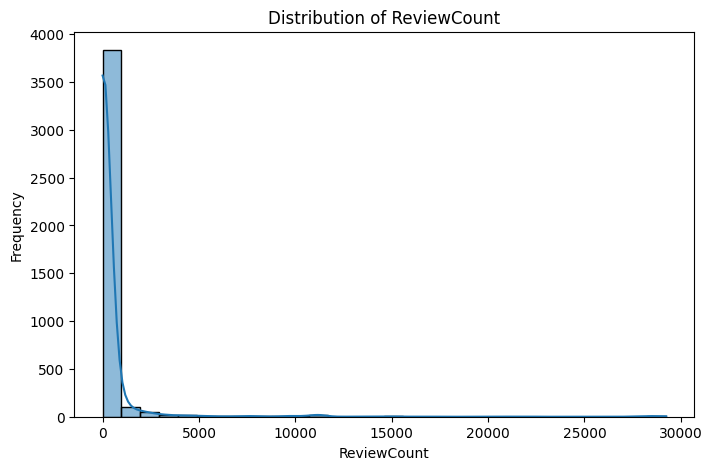

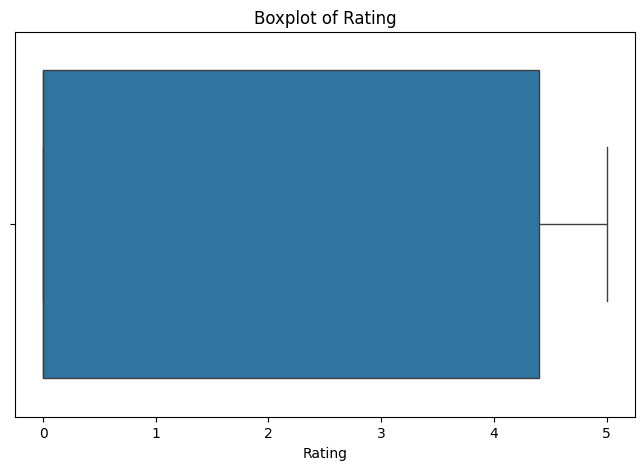

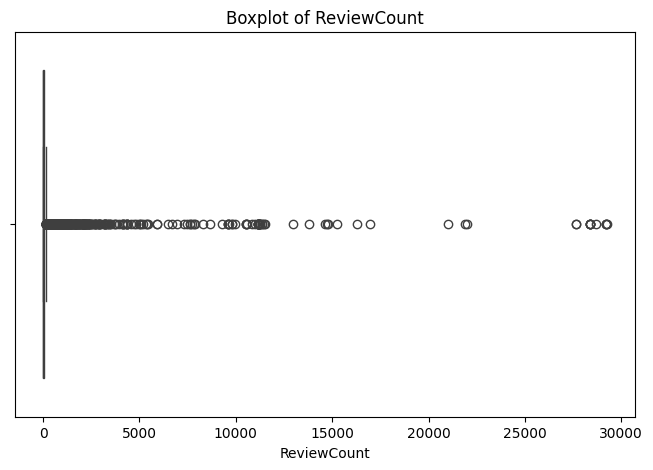

In [10]:
numerical_cols = ['Rating', 'ReviewCount']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

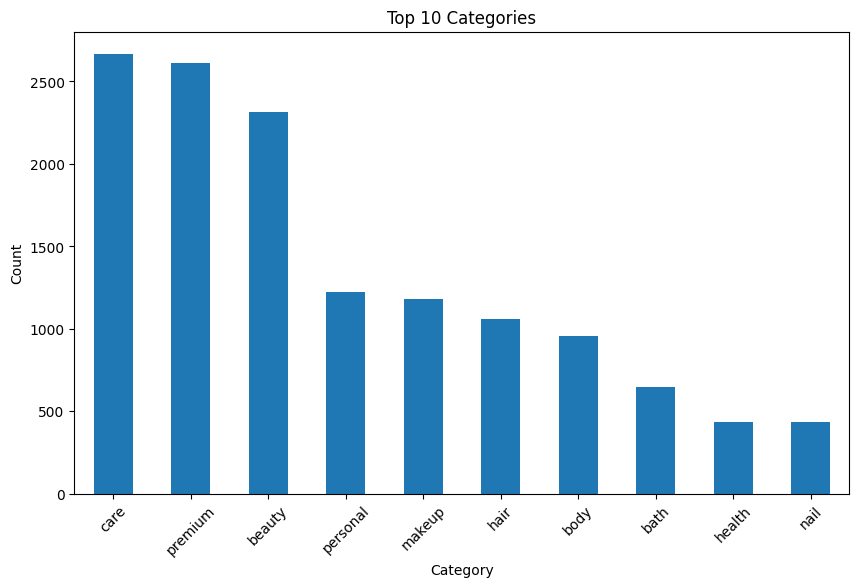

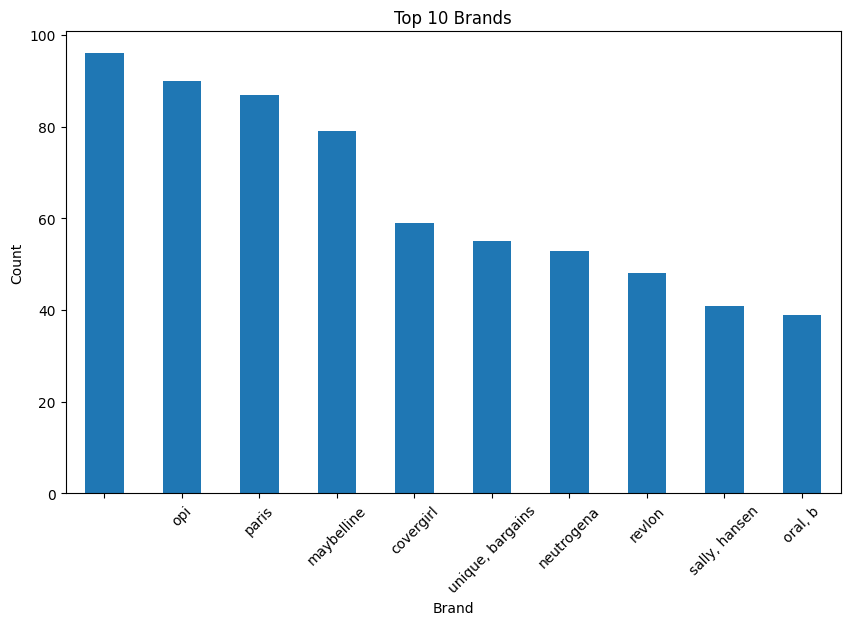

In [11]:
# Parse categories
df['Category_List'] = df['Category'].str.split(', ')
all_categories = df['Category_List'].explode()

# Top 10 categories
plt.figure(figsize=(10, 6))
all_categories.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 brands
plt.figure(figsize=(10, 6))
df['Brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

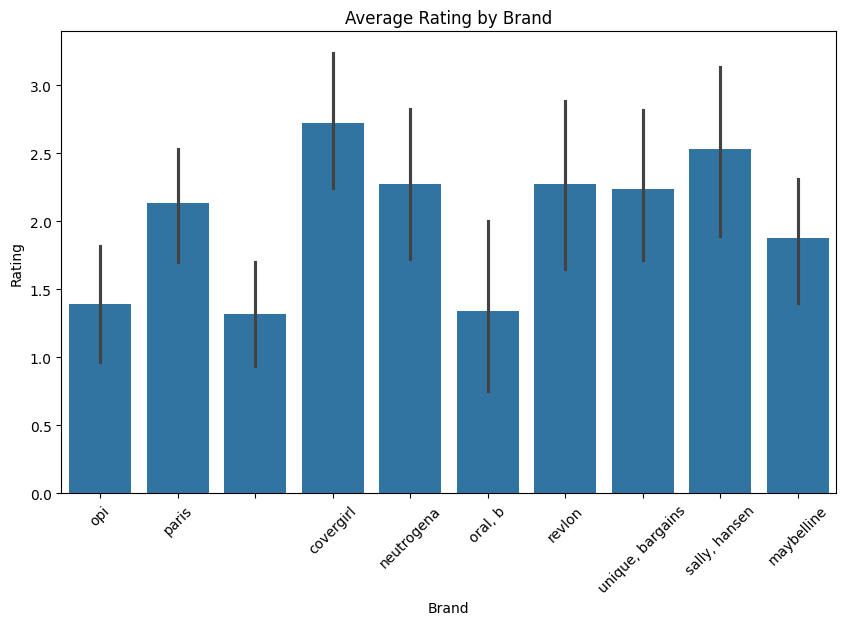

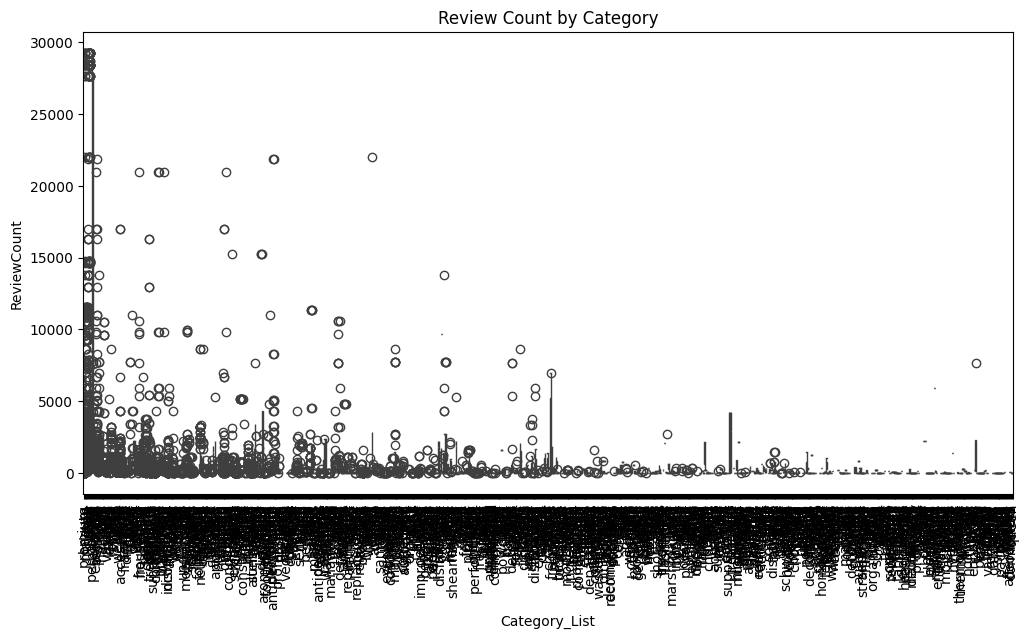

In [12]:
# Average rating by top 10 brands
top_brands = df['Brand'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Rating', data=df[df['Brand'].isin(top_brands)])
plt.title('Average Rating by Brand')
plt.xticks(rotation=45)
plt.show()

# Review count by category
plt.figure(figsize=(12, 6))
sns.boxplot(x=all_categories, y=df['ReviewCount'])
plt.title('Review Count by Category')
plt.xticks(rotation=90)
plt.show()

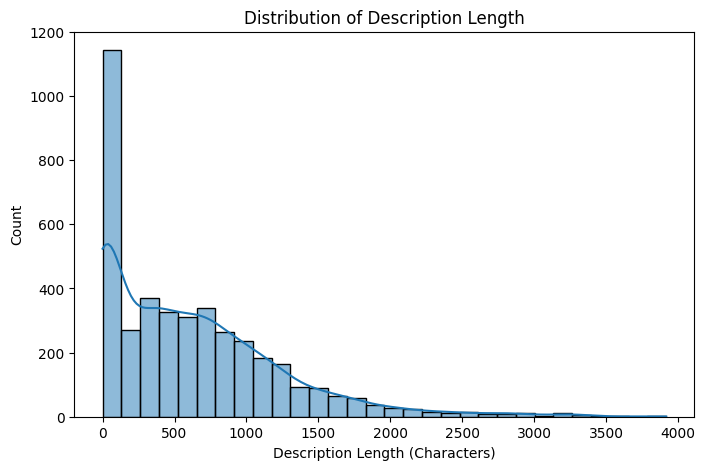

In [13]:
df['Description_Length'] = df['Description'].str.len()
plt.figure(figsize=(8, 5))
sns.histplot(df['Description_Length'], bins=30, kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Description Length (Characters)')
plt.show()

ReviewCount Outliers:
                                                 Name  ReviewCount  Rating
2   Clairol Nice N Easy Permanent Color 7/106A Nat...      29221.0     4.5
9   (3 pack) Vaseline Lip Therapy Tinted Lip Balm ...        950.0     0.0
12  LOreal Paris True Match Super-Blendable Blush,...        184.0     3.8
13  Pantene Shampoo and Conditioner Set, Sheer Vol...        413.0     4.1
15  Clairol Natural Instincts Demi-Permanent Hair ...       2935.0     3.7


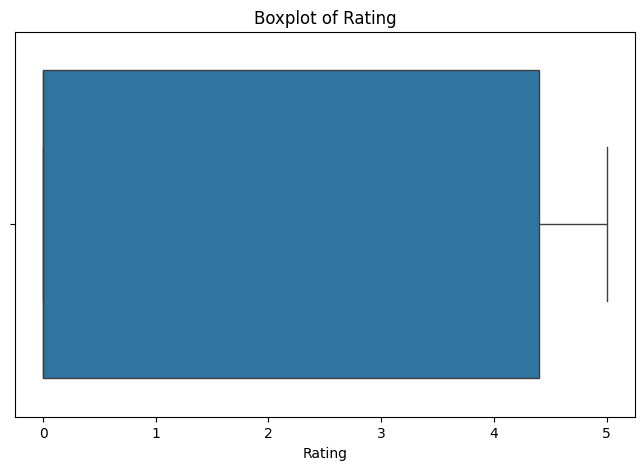

In [14]:
# IQR for ReviewCount
Q1 = df['ReviewCount'].quantile(0.25)
Q3 = df['ReviewCount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['ReviewCount'] < Q1 - 1.5 * IQR) | (df['ReviewCount'] > Q3 + 1.5 * IQR)]
print("ReviewCount Outliers:")
print(outliers[['Name', 'ReviewCount', 'Rating']].head())

# Rating outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.show()

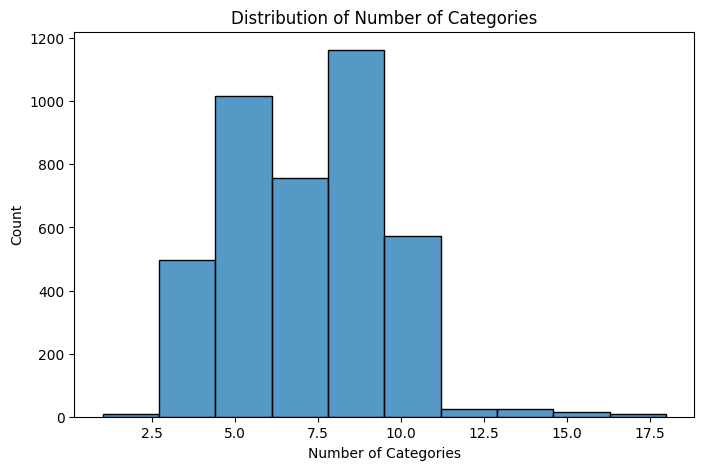

Products with Reviews:
Has_Reviews
True     2748
False    1342
Name: count, dtype: int64


In [15]:
# Number of categories
df['Num_Categories'] = df['Category'].str.split(', ').str.len()
plt.figure(figsize=(8, 5))
sns.histplot(df['Num_Categories'], bins=10)
plt.title('Distribution of Number of Categories')
plt.xlabel('Number of Categories')
plt.show()

# Has reviews
df['Has_Reviews'] = df['ReviewCount'] > 0
print("Products with Reviews:")
print(df['Has_Reviews'].value_counts())

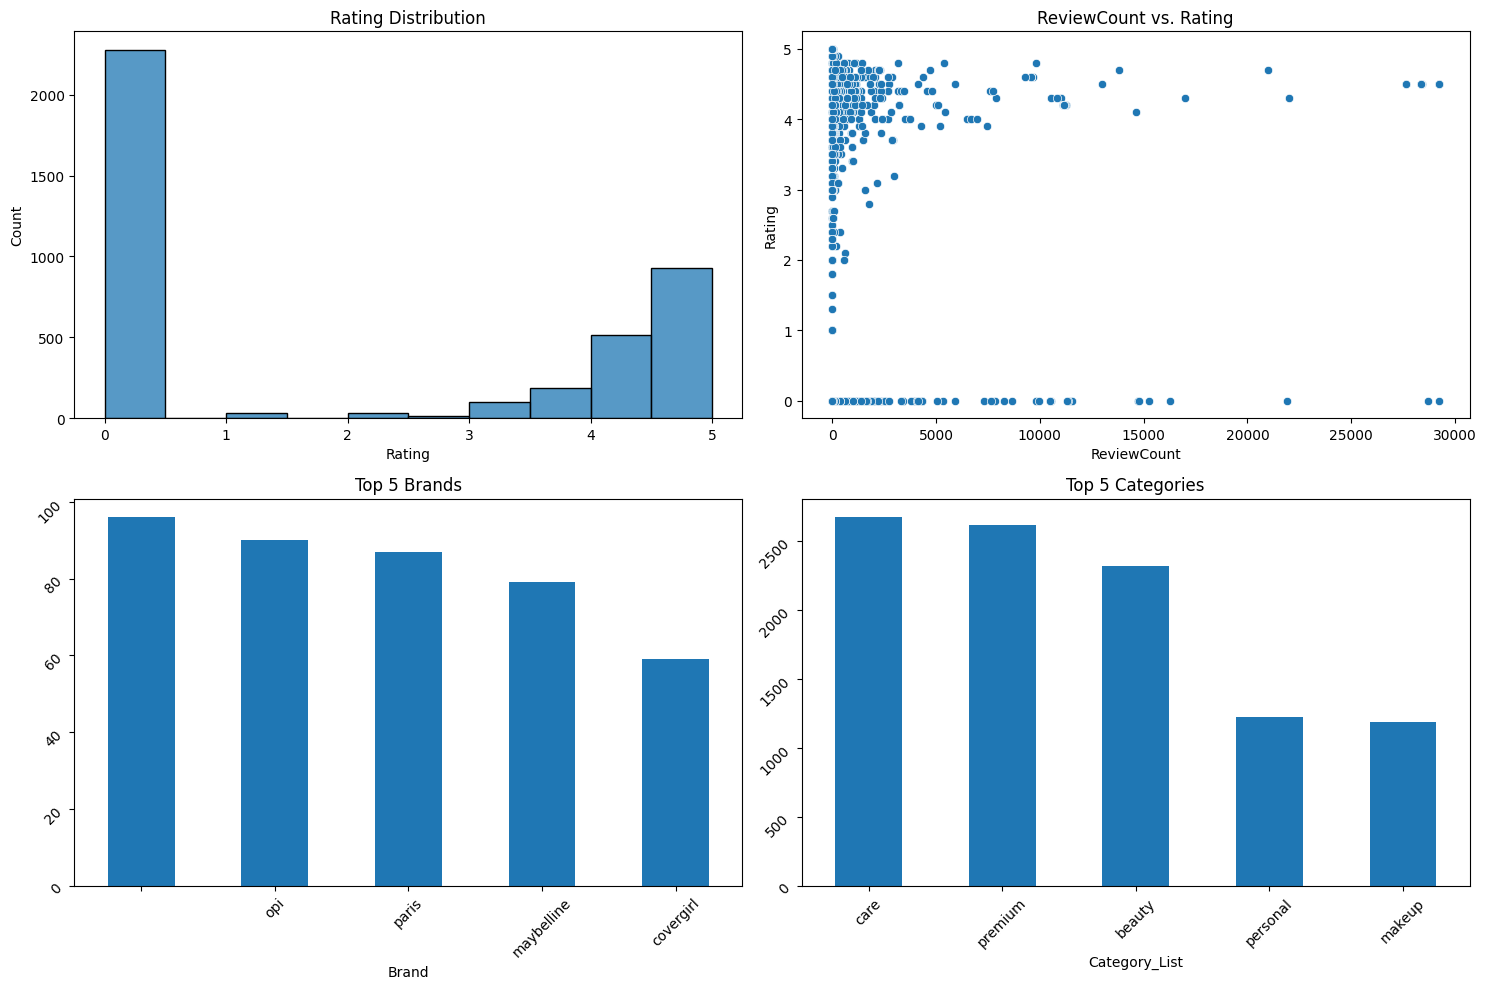

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rating distribution
sns.histplot(df['Rating'], bins=10, ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution')

# ReviewCount vs. Rating
sns.scatterplot(x='ReviewCount', y='Rating', data=df, ax=axes[0, 1])
axes[0, 1].set_title('ReviewCount vs. Rating')

# Top 5 brands
df['Brand'].value_counts().head(5).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Brands')
axes[1, 0].tick_params(rotation=45)

# Top 5 categories
all_categories.value_counts().head(5).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Categories')
axes[1, 1].tick_params(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

def content_based_recommendation(df,name):
    if name not in df['Name'].values:
        print(name,'not found')
        return pd.dataframe()

    vectroizer=TfidfVectorizer(stop_words='english')
    matrix=vectroizer.fit_transform(df['Tags'])
    cosinesimilarity=cosine_similarity(matrix,matrix)
    
    x = df[df['Name'] == name].index[0]
    similarities = list(enumerate(cosinesimilarity[x]))
    sorted_similar = sorted(similarities, key=lambda item: item[1], reverse=True)
    z=sorted_similar[:10+1]
    a=[y[0] for y in z]
    
    recommendations=df.iloc [a]
    return recommendations


content_based_recommendation(df,'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath')

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags,Category_List,Description_Length,Num_Categories,Has_Reviews
0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,False
155,90,58,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,https://i5.walmartimages.com/asr/71caed3f-5f83...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,False
183,4133,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/2d6f5147-53a8...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,False
203,795649,7,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,False
234,43,4103,0.0,5.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,https://i5.walmartimages.com/asr/7426eb5c-1690...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,True
318,3,4,0.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Gel Polish Fall 2019 Scotland Collection G...,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,True
366,994,3402,5.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/744e869c-3500...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,True
392,9,58,4.4,57.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",https://i5.walmartimages.com/asr/b95676e5-96ab...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,True
671,5400539,94,5.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/c7ba4815-52f7...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,True
820,36,7,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,https://i5.walmartimages.com/asr/98b4194c-e026...,,"premium, beauty, premium, makeup, premium, nai...","[premium, beauty, premium, makeup, premium, na...",0,11,False


In [ ]:
from sklearn.neighbors import NearestNeighbors

def knn_user_recommender(df, user_id, n_neighbors=5, top_n=10):
    
    df = df.copy()
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').fillna(0)
    user_item_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)
    
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(user_item_matrix)
    user_idx = user_item_matrix.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(user_item_matrix.iloc[user_idx].values.reshape(1, -1), n_neighbors=n_neighbors + 1)

    
    neighbor_indices = indices.flatten()[1:] 
    recommendations = pd.Series(0.0, index=user_item_matrix.columns)

    for neighbor_idx in neighbor_indices:
        neighbor_ratings = user_item_matrix.iloc[neighbor_idx]
        unrated_items = user_item_matrix.iloc[user_idx] == 0
        neighbor_rated = neighbor_ratings[unrated_items]
        recommendations = recommendations.add(neighbor_rated, fill_value=0)

    
    recommendations = recommendations / len(neighbor_indices)  
    recommended_prod_ids = recommendations.sort_values(ascending=False).head(top_n).index
    predicted_ratings = recommendations[recommended_prod_ids].values

    
    recommended_items = df[df['ProdID'].isin(recommended_prod_ids)].drop_duplicates('ProdID')
    recommended_items = recommended_items[['ProdID', 'Name', 'Brand']].head(top_n)
    
    
    rating_map = pd.Series(predicted_ratings, index=recommended_prod_ids).to_dict()
    recommended_items['Predicted_Rating'] = recommended_items['ProdID'].map(rating_map)

    return recommended_items

knn_user_recommender(df,7)

,ProdID,Name,Brand,Predicted_Rating
15,1,Clairol Natural Instincts Demi-Permanent Hair ...,clairol,0.88
139,84,FLOWER Beauty Shimmer & Shade Eyeshadow Palett...,"flower, beauty",0.96
165,41,"Emuaid Maximum Strength First Aid Ointment, 2 Oz",emuaid,1.00
420,82,Retinol Cream Anti Wrinkle Moisturizer - Clini...,"tree, life, beauty",0.92
439,460,Hefty Ultra Strong 33 Gal. Trash Can Liner Ext...,hefty,0.86
773,96961056,"Arm & Hammer Plus OxiClean Fresh Scent, 106 Lo...","arm, hammer",0.96
929,92,Albolene Moisturizing Cleanser Unscented 6 oz ...,albolene,0.84
1052,77,"Oral-B Pro 7500 Electric Toothbrush, Rechargea...","oral, b",0.96
1416,37,Sally Hansen Mega Strength Nail Polish Lacquer...,"sally, hansen",0.86
3202,870,"Prell Shampoo, Classic Clean 13.50 oz (Pack of 4)",prell,1.00


In [ ]:
def hybrid_recommendation(user_id, product_name, df, top_n=10, alpha=0.5):
    collaborative_recs = knn_user_recommender(df, user_id, n_neighbors=5, top_n=top_n * 2) 
    content_recs = content_based_recommendation(df, product_name)
    if collaborative_recs is None or collaborative_recs.empty:
        return content_recs.head(top_n)
    if content_recs is None or content_recs.empty:
        return collaborative_recs.head(top_n)
    combined = pd.concat([collaborative_recs, content_recs])

    combined = combined.drop_duplicates(subset='ProdID').head(top_n)

    return combined



result = hybrid_recommendation(7,"OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath",df,)

result



,ProdID,Name,Brand,Predicted_Rating,ID,Rating,ReviewCount,Category,ImageURL,Description,Tags,Category_List,Description_Length,Num_Categories,Has_Reviews
3,3,"Kokie Professional Matte Lipstick, Hot Berry, ...","kokie, cosmetics",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1,Clairol Natural Instincts Demi-Permanent Hair ...,clairol,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,6,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",dentek,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,15,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",bioastin,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,84,FLOWER Beauty Shimmer & Shade Eyeshadow Palett...,"flower, beauty",0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,41,"Emuaid Maximum Strength First Aid Ointment, 2 Oz",emuaid,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,82,Retinol Cream Anti Wrinkle Moisturizer - Clini...,"tree, life, beauty",0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,460,Hefty Ultra Strong 33 Gal. Trash Can Liner Ext...,hefty,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,96961056,"Arm & Hammer Plus OxiClean Fresh Scent, 106 Lo...","arm, hammer",0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,92,Albolene Moisturizing Cleanser Unscented 6 oz ...,albolene,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:

print("\nRecommendations for user_id 7:")
print(knn_user_recommender(df, 7))


Recommendations for user_id 7:
        ProdID                                               Name  \
15           1  Clairol Natural Instincts Demi-Permanent Hair ...   
139         84  FLOWER Beauty Shimmer & Shade Eyeshadow Palett...   
165         41   Emuaid Maximum Strength First Aid Ointment, 2 Oz   
420         82  Retinol Cream Anti Wrinkle Moisturizer - Clini...   
439        460  Hefty Ultra Strong 33 Gal. Trash Can Liner Ext...   
773   96961056  Arm & Hammer Plus OxiClean Fresh Scent, 106 Lo...   
929         92  Albolene Moisturizing Cleanser Unscented 6 oz ...   
1052        77  Oral-B Pro 7500 Electric Toothbrush, Rechargea...   
1416        37  Sally Hansen Mega Strength Nail Polish Lacquer...   
3202       870  Prell Shampoo, Classic Clean 13.50 oz (Pack of 4)   

                   Brand  Predicted_Rating  
15               clairol              0.88  
139       flower, beauty              0.96  
165               emuaid              1.00  
420   tree, life, beauty    

In [ ]:
def precision_at_k(predicted, actual, k=10):
    predicted_binary = [1 if prod in predicted[:k].values else 0 for prod in actual]
    
    return precision_score([1]*len(actual), predicted_binary, average='micro')  

def recall_at_k(predicted, actual, k=10):
    predicted_binary = [1 if prod in predicted[:k].values else 0 for prod in actual]
    
    return recall_score([1]*len(actual), predicted_binary, average='micro') 


predicted_items = knn_user_recommender(df, user_id)

actual_items = df.loc[df['ID'] == user_id, 'ProdID']

precision = precision_at_k(predicted_items['ProdID'], actual_items, k=10)
recall = recall_at_k(predicted_items['ProdID'], actual_items, k=10)

print(f"Precision@10: {precision}, Recall@10: {recall}")


Precision@10: 0.025423728813559324, Recall@10: 0.025423728813559324


In [ ]:
from sklearn.metrics import precision_score, recall_score
import pandas as pd


def precision_at_k(predicted, actual, k=10):
    
    predicted_binary = [1 if prod in predicted[:k].values else 0 for prod in actual]
    
    if not predicted_binary: 
        return 0.0
    return precision_score([1]*len(actual), predicted_binary, average='micro')

def recall_at_k(predicted, actual, k=10):
   
    predicted_binary = [1 if prod in predicted[:k].values else 0 for prod in actual]
   
    if not predicted_binary: 
        return 0.0
    return recall_score([1]*len(actual), predicted_binary, average='micro')


def evaluate_knn(df, user_id, knn_user_recommender, k=10):
   
    actual_items = df.loc[df['ID'] == user_id, 'ProdID'].unique()
    
    if len(actual_items) == 0:
        print(f"No ratings found for user_id {user_id}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    
 
    recommended_items = knn_user_recommender(df, user_id, n_neighbors=5, top_n=k)
    
    if recommended_items.empty:
        print(f"No recommendations returned for user_id {user_id}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    
   
    predicted_items = recommended_items['ProdID'].head(k)
    
   
    precision = precision_at_k(predicted_items, actual_items, k=k)
    recall = recall_at_k(predicted_items, actual_items, k=k)
    
    return {'Precision@K': precision, 'Recall@K': recall}


def evaluate_content_based(df, product_name, user_id, k=10):

    actual_items = df.loc[df['ID'] == user_id, 'ProdID'].unique()
    
    if len(actual_items) == 0:
        print(f"No ratings found for user_id {user_id}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    

    recommended_items = content_based_recommendation(df, product_name)
    
    if recommended_items.empty:
        print(f"No recommendations returned for product: {product_name}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    

    predicted_items = recommended_items['ProdID'].head(k)
    

    precision = precision_at_k(predicted_items, actual_items, k=k)
    recall = recall_at_k(predicted_items, actual_items, k=k)
    
    return {'Precision@K': precision, 'Recall@K': recall}


def evaluate_hybrid(df, user_id, product_name, k=10):
  
    actual_items = df.loc[df['ID'] == user_id, 'ProdID'].unique()
    
    if len(actual_items) == 0:
        print(f"No ratings found for user_id {user_id}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    
   
    recommended_items = hybrid_recommendation(user_id, product_name, df, top_n=k)
    
    if recommended_items.empty:
        print(f"No recommendations returned for user_id {user_id} and product: {product_name}")
        return {'Precision@K': 0.0, 'Recall@K': 0.0}
    
   
    predicted_items = recommended_items['ProdID'].head(k)
    
    
    precision = precision_at_k(predicted_items, actual_items, k=k)
    recall = recall_at_k(predicted_items, actual_items, k=k)
    
    return {'Precision@K': precision, 'Recall@K': recall}



user_id = 7  
product_name = "OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath"
    
   
print(f"\nEvaluating KNN Recommendation for user_id {user_id}")
knn_metrics = evaluate_knn(df, user_id, knn_user_recommender, k=10)
print(f"KNN - Precision@10: {knn_metrics['Precision@K']}, Recall@10: {knn_metrics['Recall@K']}")
    
  
print(f"\nEvaluating Content-Based Recommendation for product: {product_name}")
content_metrics = evaluate_content_based(df, product_name, user_id, k=10)
print(f"Content-Based - Precision@10: {content_metrics['Precision@K']}, Recall@10: {content_metrics['Recall@K']}")
    
    
print(f"\nEvaluating Hybrid Recommendation for user_id {user_id} and product: {product_name}")
hybrid_metrics = evaluate_hybrid(df, user_id, product_name, k=10)
print(f"Hybrid - Precision@10: {hybrid_metrics['Precision@K']}, Recall@10: {hybrid_metrics['Recall@K']}")
    



Evaluating KNN Recommendation for user_id 7
KNN - Precision@10: 0.02702702702702703, Recall@10: 0.02702702702702703

Evaluating Content-Based Recommendation for product: OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath
Content-Based - Precision@10: 0.036036036036036036, Recall@10: 0.036036036036036036

Evaluating Hybrid Recommendation for user_id 7 and product: OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath
Hybrid - Precision@10: 0.04504504504504504, Recall@10: 0.04504504504504504


C:\Users\PC\AppData\Local\Temp\ipykernel_1268\358317318.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Precision@10', data=results_df, palette='Blues')
C:\Users\PC\AppData\Local\Temp\ipykernel_1268\358317318.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Recall@10', data=results_df, palette='Greens')


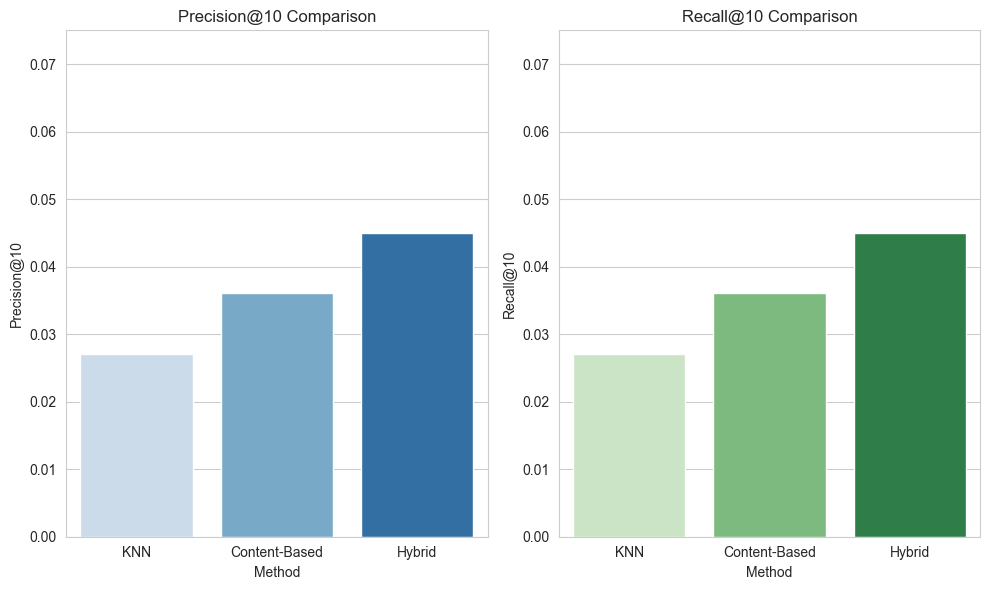

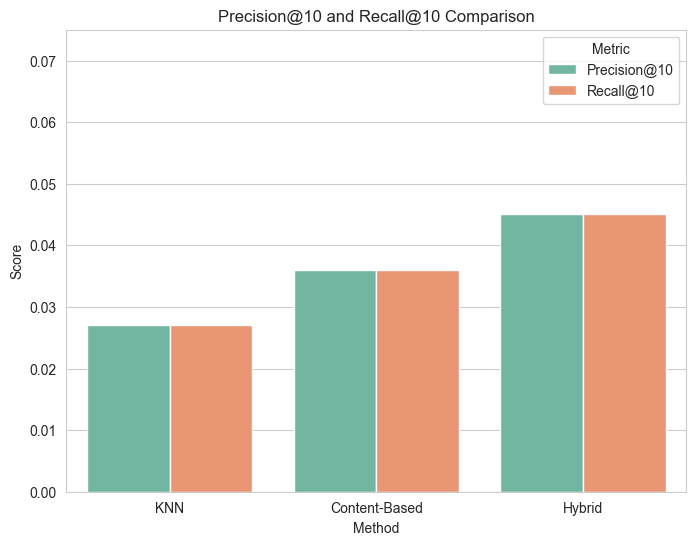

In [ ]:

results = {
    'Method': ['KNN', 'Content-Based', 'Hybrid'],
    'Precision@10': [knn_metrics['Precision@K'], content_metrics['Precision@K'], hybrid_metrics['Precision@K']],
    'Recall@10': [knn_metrics['Recall@K'], content_metrics['Recall@K'], hybrid_metrics['Recall@K']]
}


results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


plt.subplot(1, 2, 1)
sns.barplot(x='Method', y='Precision@10', data=results_df, palette='Blues')
plt.title('Precision@10 Comparison')
plt.ylim(0, 0.075)  
plt.ylabel('Precision@10')


plt.subplot(1, 2, 2)
sns.barplot(x='Method', y='Recall@10', data=results_df, palette='Greens')
plt.title('Recall@10 Comparison')
plt.ylim(0, 0.075)  
plt.ylabel('Recall@10')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
results_melted = results_df.melt(id_vars='Method', value_vars=['Precision@10', 'Recall@10'], 
                                 var_name='Metric', value_name='Score')
sns.barplot(x='Method', y='Score', hue='Metric', data=results_melted, palette='Set2')
plt.title('Precision@10 and Recall@10 Comparison')
plt.ylim(0, 0.075)  
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

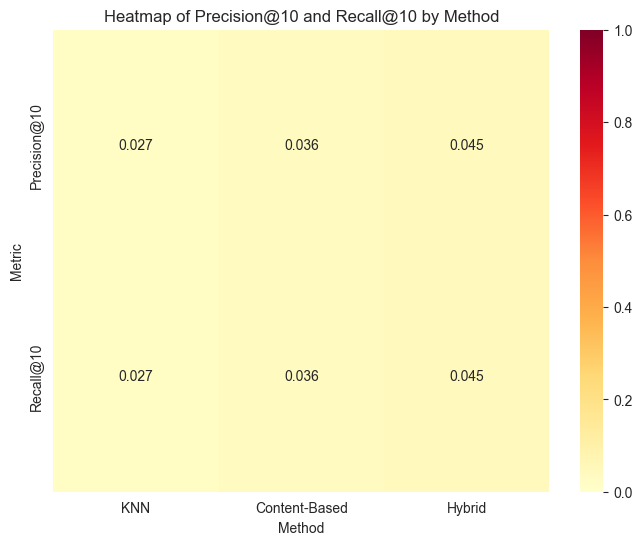

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


results = {
    'Method': ['KNN', 'Content-Based', 'Hybrid'],
    'Precision@10': [knn_metrics['Precision@K'], content_metrics['Precision@K'], hybrid_metrics['Precision@K']],
    'Recall@10': [knn_metrics['Recall@K'], content_metrics['Recall@K'], hybrid_metrics['Recall@K']]
}


results_df = pd.DataFrame(results)


heatmap_data = results_df.set_index('Method').T


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', vmin=0, vmax=1, fmt='.3f')
plt.title('Heatmap of Precision@10 and Recall@10 by Method')
plt.xlabel('Method')
plt.ylabel('Metric')
plt.show()